In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
os.getcwd()

'C:\\Users\\b0a0042\\Desktop\\1. Files\\Clustering in Python\\Code Snippets-2\\Code Snippets\\47. Agglomerative Clustering - Code Demo'

In [2]:
#change working directory if data is in that location
data_dir='Z:\ML Course\Clustering\Data'
os.chdir(data_dir)

In [57]:
data=pd.read_csv("pollution_india_2010.csv",na_values='Null')

In [58]:
data.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9.0,39.0,4.0,Andhra Pradesh
1,Guntur,11.0,81.0,2.0,Andhra Pradesh
2,Hydrabad,24.0,79.0,5.0,Andhra Pradesh
3,Kothagudem,11.0,62.0,2.0,Andhra Pradesh
4,Kurnool,9.0,85.0,4.0,Andhra Pradesh


In [59]:
data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [9]:
data.shape

(181, 5)

In [10]:
data=data.dropna()

In [11]:
data.shape

(175, 5)

In [12]:
data.dtypes
#https://stackoverflow.com/questions/29877508/what-does-dtype-object-mean-while-creating-a-numpy-array

City      object
NO2      float64
PM10     float64
SO2      float64
State     object
dtype: object

In [60]:
data_pol=data.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(np.sum)
#For aggregated output,as_index=False does not return object with group labels as the index. 
#Only relevant for DataFrame input. as_index=False is effectively “SQL-style” grouped output

In [61]:
data_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,105.0,502.0,45.0


In [62]:
data_pol

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,105.0,502.0,45.0
5,Dadra and Nagar Haveli,18.0,39.0,7.0
6,Daman and Diu,18.0,35.0,7.0
7,Delhi,55.0,261.0,5.0
8,Goa,217.0,893.0,118.0
9,Gujarat,166.0,621.0,105.0


In [63]:
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("State",axis=1) #for drop axis = 1 refers to columnwise operation
data_scaled=data_num.apply(scale,axis=0) #for apply axis =0 refers to columnwise operation

In [64]:
data_scaled

,NO2,PM10,SO2
0,0.230500,0.377853,-0.006831
1,0.191898,0.277417,0.178067
2,-0.689503,-0.834188,-0.706801
3,-0.843909,-0.985693,-0.772836
4,-0.271320,-0.287748,-0.204936
5,-0.831042,-1.075916,-0.706801
6,-0.831042,-1.082725,-0.706801
7,-0.592999,-0.698004,-0.733215
8,0.449242,0.377853,0.759174
9,0.121129,-0.085174,0.587483


In [65]:
data_num.head()

,NO2,PM10,SO2
0,183.0,893.0,60.0
1,177.0,834.0,74.0
2,40.0,181.0,7.0
3,16.0,92.0,2.0
4,105.0,502.0,45.0


In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [67]:
data_scaled=np.array(data_scaled)

In [68]:
Z=linkage(data_scaled,method="ward")
#single', 'complete', 'average' 

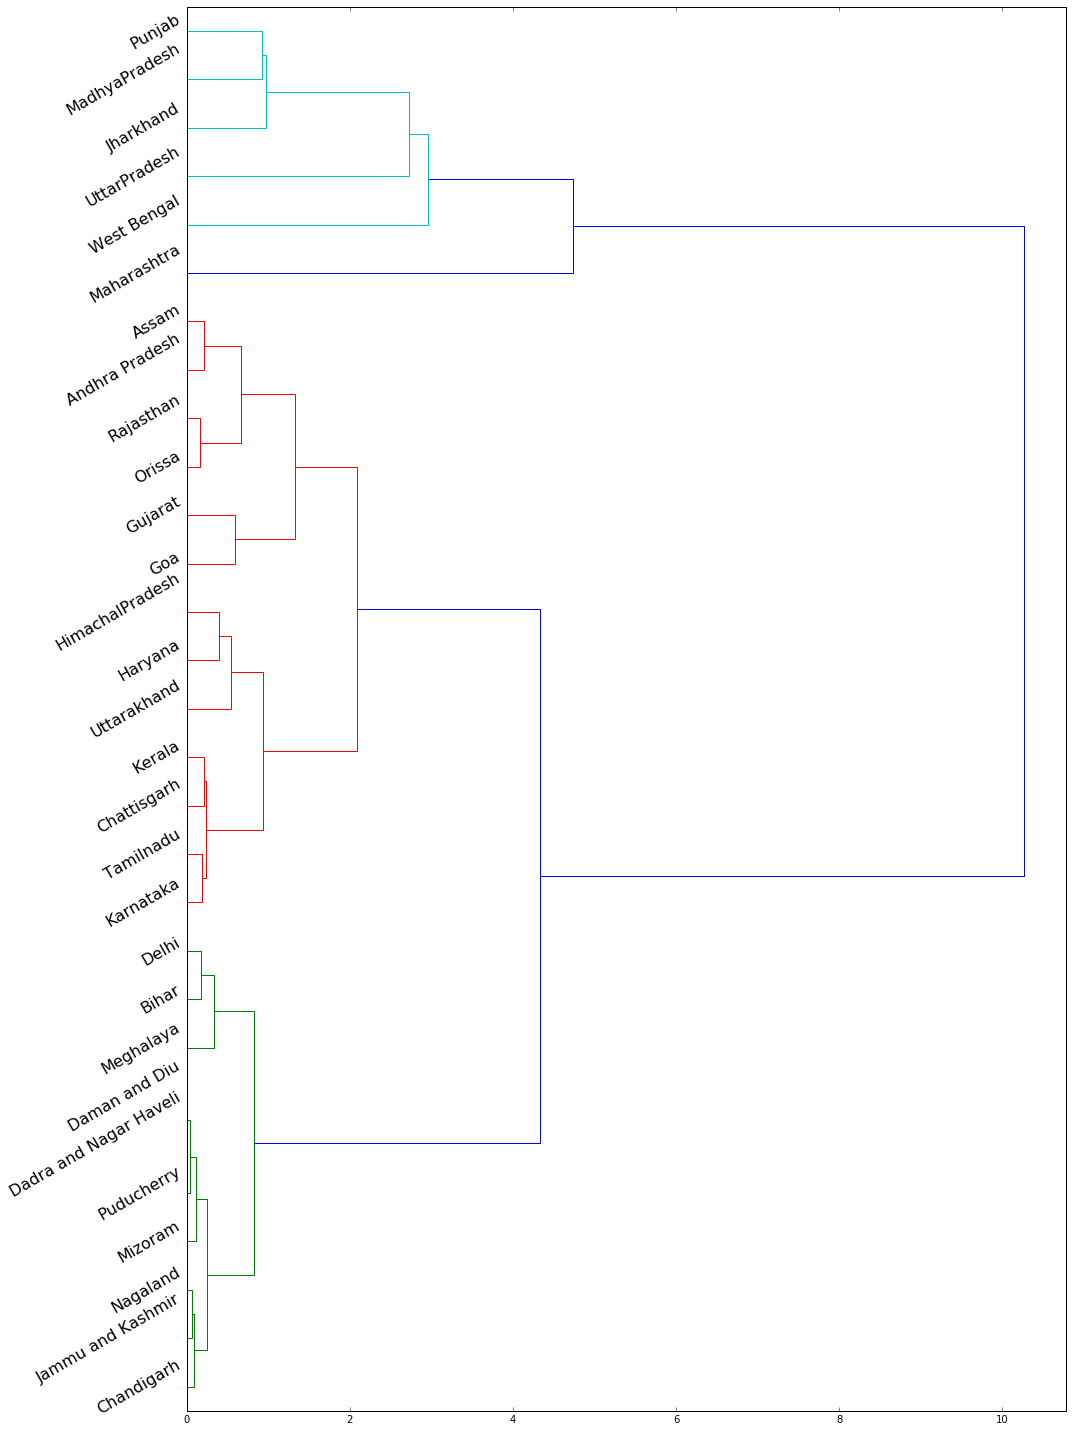

In [78]:
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(data_pol['State']),
              leaf_rotation=30,leaf_font_size=16,color_threshold=4)
             #(truncate_mode = 'lastp',p=4,show_contracted=True)
plt.tight_layout()
plt.show()

In [76]:
assignments=fcluster(linkage(data_scaled,method="ward"),4,'distance')

In [77]:
assignments

array([2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 3, 2, 2, 3, 4, 1, 1, 1, 2, 1,
       3, 2, 2, 3, 2, 3])

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
Hclustering = AgglomerativeClustering(n_clusters=10,
 affinity= 'euclidean', linkage='ward')

In [35]:
Hclustering.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10, n_components=None,
            pooling_func=<function mean at 0x0000000003E0FC18>)

In [36]:
Hclustering.labels_

array([0, 0, 1, 1, 2, 1, 1, 1, 3, 3, 2, 2, 1, 8, 2, 2, 9, 5, 1, 1, 1, 0, 1,
       7, 0, 2, 6, 1, 4], dtype=int64)